In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
source_dir = '/kaggle/input' if os.path.exists('/kaggle') else 'kaggle/input'
for dirname, _, filenames in os.walk(source_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

kaggle/input/test.csv
kaggle/input/train.csv
kaggle/input/sample_submission.csv


In [18]:
train = pd.read_csv(source_dir + '/train.csv')
train.head(5)

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [19]:
test = pd.read_csv(source_dir + '/test.csv')
test.head(5)

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0  7905    3839  D-penicillamine  19724   F       N            Y       N   
1  7906    2468  D-penicillamine  14975   F       N            N       N   
2  7907      51          Placebo  13149   F       N            Y       N   
3  7908    2330  D-penicillamine  20510   F       N            N       N   
4  7909    1615  D-penicillamine  21904   F       N            Y       N   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     N        1.2        546.0     3.37    65.0    1636.0  151.90   
1     N        1.1        660.0     4.22    94.0    1257.0  151.90   
2     Y        2.0        151.0     2.96    46.0     961.0   69.75   
3     N        0.6        293.0     3.85    40.0     554.0  125.55   
4     N        1.4        277.0     2.97   121.0    1110.0  125.00   

   Tryglicerides  Platelets  Prothrombin  Stage  
0           90.0      430.0         10.6    2.0  
1          155.0      227.0         10.0    2.0  
2          101.0      213.0         13.0    4.0  
3           56.0      270.0         10.6    2.0  
4          126.0      221.0          9.8    1.0

In [20]:
sample_submission = pd.read_csv(source_dir + '/sample_submission.csv')
sample_submission.head(5)

id  Status_C  Status_CL  Status_D
0  7905  0.628084   0.034788  0.337128
1  7906  0.628084   0.034788  0.337128
2  7907  0.628084   0.034788  0.337128
3  7908  0.628084   0.034788  0.337128
4  7909  0.628084   0.034788  0.337128

In [13]:
#TODO: Make sure that label encoding works for train and test

In [201]:
train.describe().T

count          mean          std      min       25%  \
N_Days          7732.0   2048.680031  1090.721667    41.00   1235.00   
Age             7732.0  18377.547206  3689.672623  9598.00  15574.00   
Bilirubin       7732.0      2.415158     3.459374     0.30      0.70   
Cholesterol     7732.0    334.245732   141.263962   120.00    248.00   
Albumin         7732.0      3.553514     0.343285     1.96      3.35   
Copper          7732.0     81.320098    70.149677     4.00     39.00   
Alk_Phos        7732.0   1798.573435  1903.266075   289.00    823.00   
SGOT            7732.0    112.768805    45.238060    26.35     75.95   
Tryglicerides   7732.0    113.240559    46.504603    33.00     84.00   
Platelets       7732.0    264.890326    87.520722    62.00    210.00   
Prothrombin     7732.0     10.612869     0.745511     9.00     10.00   
Stage           7732.0      3.029229     0.867156     1.00      2.00   
Drug_Placebo    7732.0      0.505949     0.499997     0.00      0.00   
Sex_M           7732.0      0.072556     0.259422     0.00      0.00   
Ascites_Y       7732.0      0.044749     0.206766     0.00      0.00   
Hepatomegaly_Y  7732.0      0.504268     0.500014     0.00      0.00   
Spiders_Y       7732.0      0.240947     0.427686     0.00      0.00   
Edema_S         7732.0      0.049146     0.216188     0.00      0.00   
Edema_Y         7732.0      0.041257     0.198897     0.00      0.00   

                     50%       75%       max  
N_Days           1874.00   2692.00   4795.00  
Age             18713.00  20684.00  28650.00  
Bilirubin           1.10      2.70     25.50  
Cholesterol       298.00    376.00   1236.00  
Albumin             3.59      3.77      4.64  
Copper             62.00     97.00    464.00  
Alk_Phos         1166.00   1833.00  13862.40  
SGOT              106.95    137.95    338.00  
Tryglicerides     103.00    137.00    393.00  
Platelets         265.00    316.00    563.00  
Prothrombin        10.60     11.00     14.10  
Stage               3.00      4.00      4.00  
Drug_Placebo        1.00      1.00      1.00  
Sex_M               0.00      0.00      1.00  
Ascites_Y           0.00      0.00      1.00  
Hepatomegaly_Y      1.00      1.00      1.00  
Spiders_Y           0.00      0.00      1.00  
Edema_S             0.00      0.00      1.00  
Edema_Y             0.00      0.00      1.00

In [202]:
test.describe().T

count          mean          std      min       25%       50%  \
id             5271.0  10540.000000  1521.750965  7905.00   9222.50  10540.00   
N_Days         5271.0   2038.696642  1086.843490    41.00   1234.00   1882.00   
Age            5271.0  18497.756782  3583.898801  9598.00  15730.00  18806.00   
Bilirubin      5271.0      2.600389     3.852395     0.30      0.70      1.10   
Cholesterol    5271.0    352.486435   200.438989   120.00    248.00    299.00   
Albumin        5271.0      3.538071     0.354886     1.96      3.35      3.57   
Copper         5271.0     84.701679    77.542064     4.00     39.00     65.00   
Alk_Phos       5271.0   1811.233314  1935.351492   289.00    823.00   1142.00   
SGOT           5271.0    113.587526    48.964789    26.35     75.00    106.95   
Tryglicerides  5271.0    115.286094    52.602780    33.00     84.00    104.00   
Platelets      5271.0    264.023715    87.584068    62.00    209.00    259.00   
Prothrombin    5271.0     10.632865     0.792711     9.00     10.00     10.60   
Stage          5271.0      3.036995     0.856030     1.00      2.00      3.00   

                    75%       max  
id             11857.50  13175.00  
N_Days          2692.00   4795.00  
Age            20684.00  28650.00  
Bilirubin          3.00     28.00  
Cholesterol      390.00   1775.00  
Albumin            3.77      4.64  
Copper           102.00    588.00  
Alk_Phos        1838.50  13862.40  
SGOT             137.95    457.25  
Tryglicerides    138.00    598.00  
Platelets        317.00    563.00  
Prothrombin       11.00     15.20  
Stage              4.00      4.00

In [21]:
print(f'Number of train rows and featurees: {train.shape}')
print(f'Number of test rows and featurees: {test.shape}')

Number of train rows and featurees: (7905, 20)
Number of test rows and featurees: (5271, 19)


In [204]:
train.isna().sum().sum(), test.isna().sum().sum(), train.duplicated().sum(), test.duplicated().sum()

(0, 0, 0, 0)

In [111]:
train.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [22]:
num_cols = [x for x in list(train.select_dtypes(include='number').columns) if x != 'id']
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

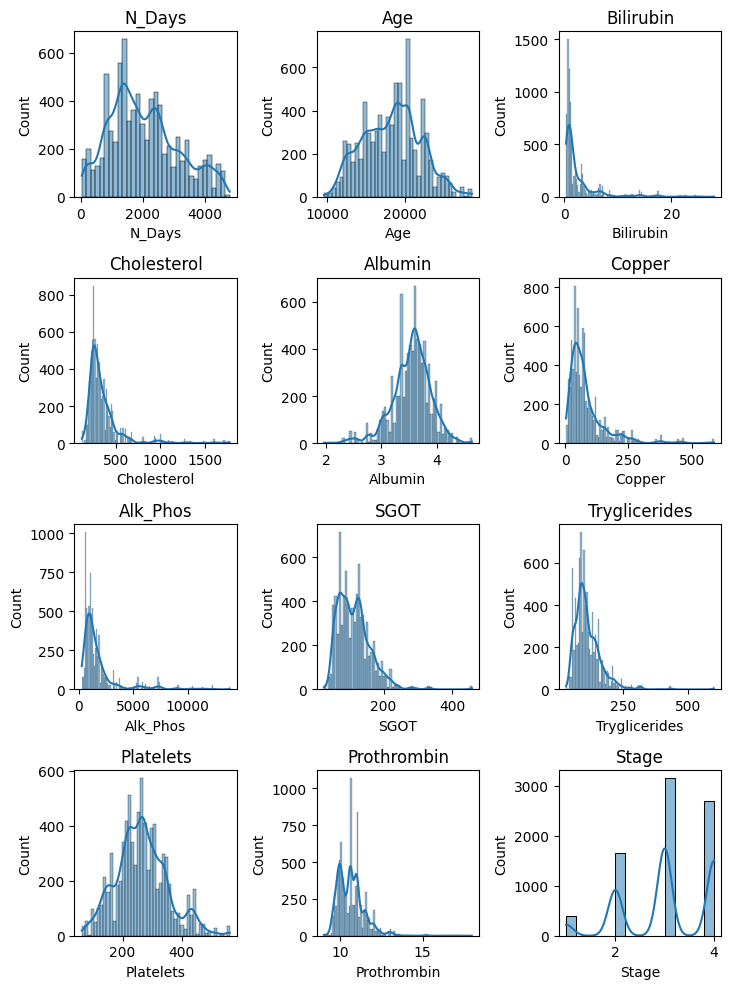

In [212]:
# Select numerical columns
#num_cols = train.select_dtypes(include='number').columns

# Determine the number of rows needed for subplots (adjust as necessary)
n_rows = len(num_cols) // 3 + (len(num_cols) % 3 > 0)

# Set up the matplotlib figure
plt.figure(figsize=(15 / 2, 5 / 2 * n_rows))

# Create subplots for each numerical column
for idx, col in enumerate(num_cols):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(train[col], kde=True)
    plt.title(col)

# Adjust layout
plt.tight_layout()
plt.show()

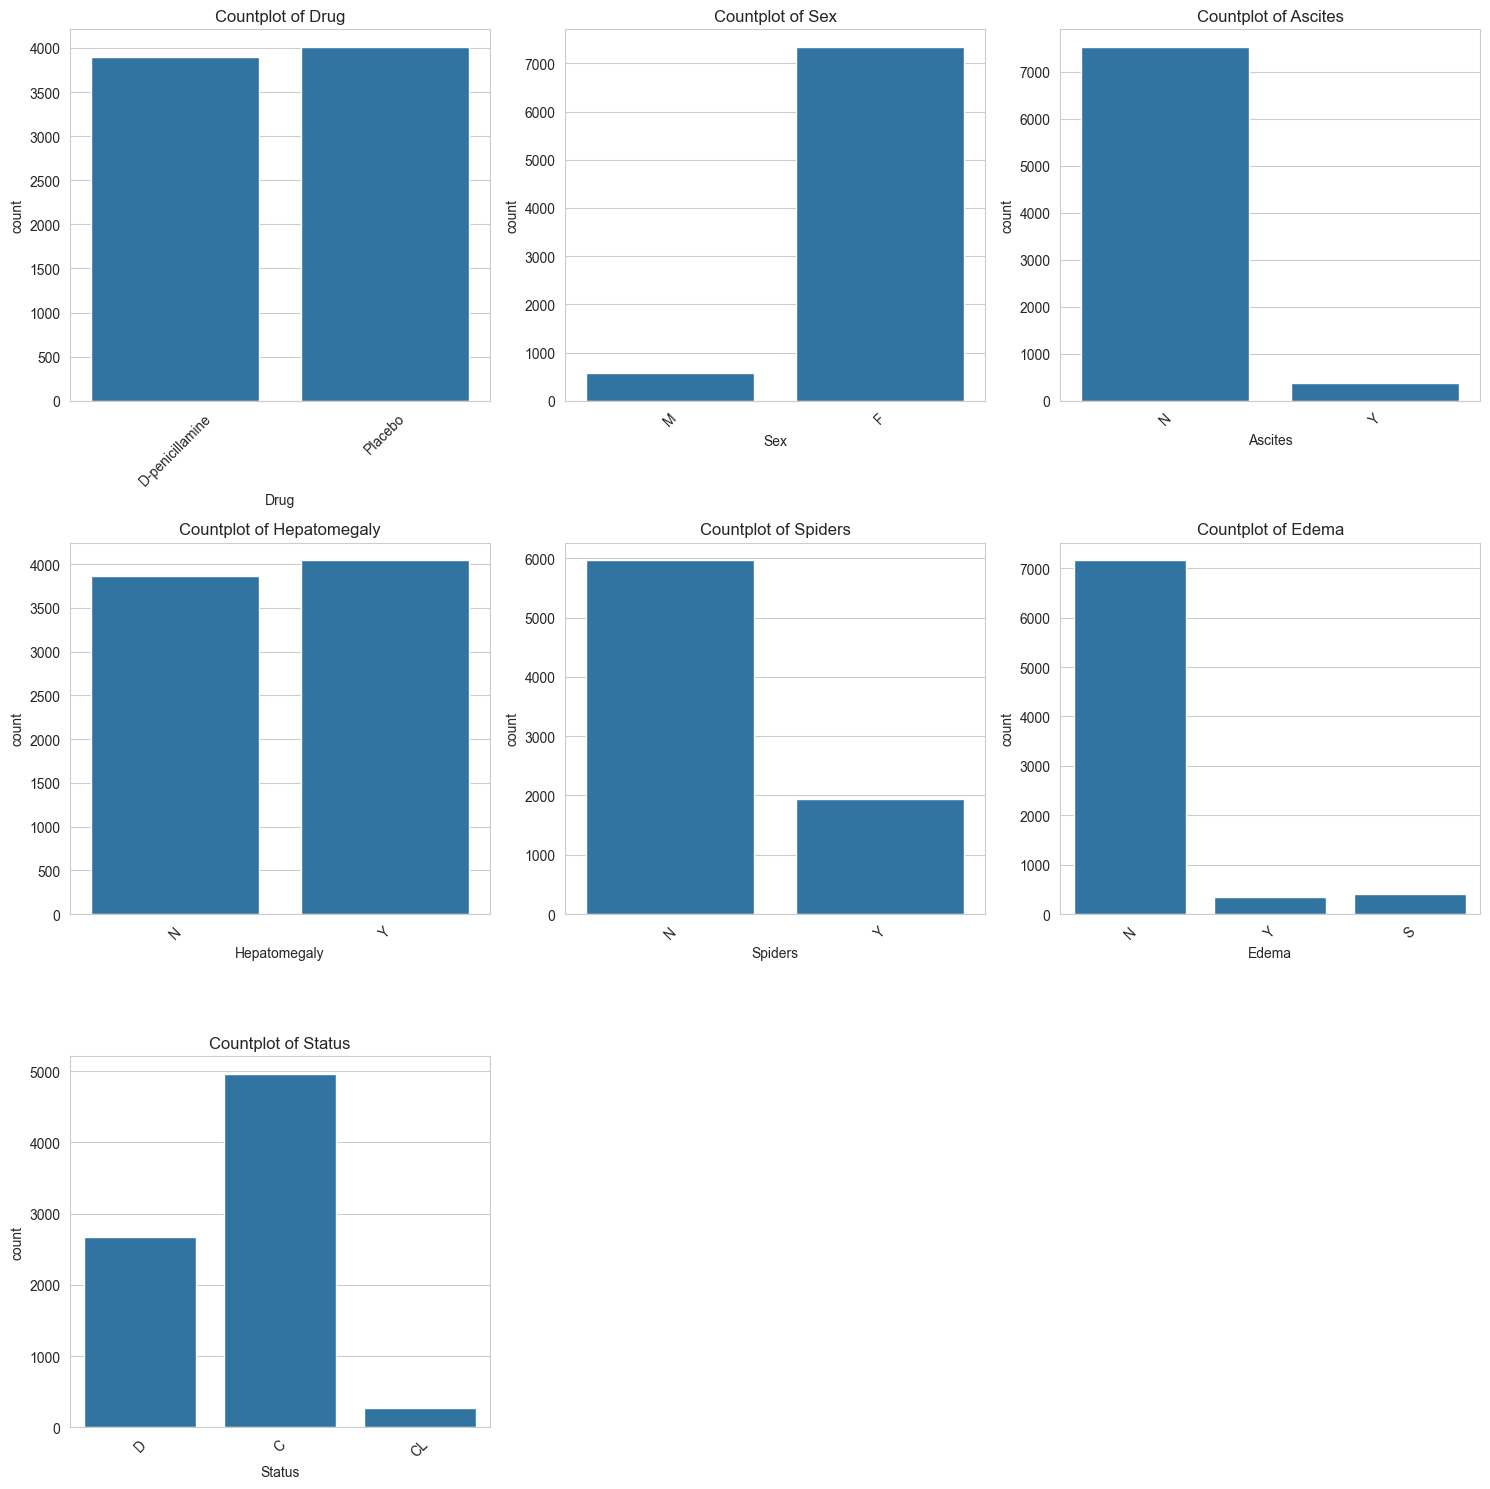

In [78]:
# Identify categorical columns. This can be adjusted based on how you define 'categorical'.
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

# Determine the layout for subplots
n_cols = 3  # You can adjust the number of columns per row
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * n_rows))

# Create a countplot for each categorical column
for idx, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, idx + 1)
    sns.countplot(x=col, data=train)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)  # Rotate labels for better readability if needed

# Adjust layout
plt.tight_layout()
plt.show()

In [290]:
# TODO: Standard scalar only on continues data

In [23]:
TARGET_VARIABLE = 'Status'
label_encoder = LabelEncoder()
label_encoder.fit(train[TARGET_VARIABLE])
c_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f'{TARGET_VARIABLE}: {c_map}')
train[TARGET_VARIABLE] = label_encoder.transform(train[TARGET_VARIABLE])

Status: {'C': 0, 'CL': 1, 'D': 2}


In [24]:
categorical_cols = [c for c in train.select_dtypes(include=['object', 'category']).columns]
# Assume 'category_column' is your categorical column
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(train[categorical_cols])

print(f'{encoder.get_feature_names_out(categorical_cols)}')

# Transform both train and test data
train_encoded = encoder.transform(train[categorical_cols])
test_encoded = encoder.transform(test[categorical_cols])

# Convert the encoded features into a DataFrame
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols)

train = train.drop(columns=categorical_cols).reset_index(drop=True)
test = test.drop(columns=categorical_cols).reset_index(drop=True)

train = pd.concat([train, train_encoded_df], axis=1)
test = pd.concat([test, test_encoded_df], axis=1)


['Drug_Placebo' 'Sex_M' 'Ascites_Y' 'Hepatomegaly_Y' 'Spiders_Y' 'Edema_S'
 'Edema_Y']


In [215]:
train.head(2)

id  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0   0     999  21532        2.3        316.0     3.35   172.0    1601.0   
1   1    2574  19237        0.9        364.0     3.54    63.0    1440.0   

     SGOT  Tryglicerides  ...  Prothrombin  Stage  Status  Drug_Placebo  \
0  179.80           63.0  ...          9.7    3.0       2           0.0   
1  134.85           88.0  ...         11.0    3.0       0           1.0   

   Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  Edema_Y  
0    1.0        0.0             0.0        0.0      0.0      0.0  
1    0.0        0.0             0.0        0.0      0.0      0.0  

[2 rows x 21 columns]

<Axes: >

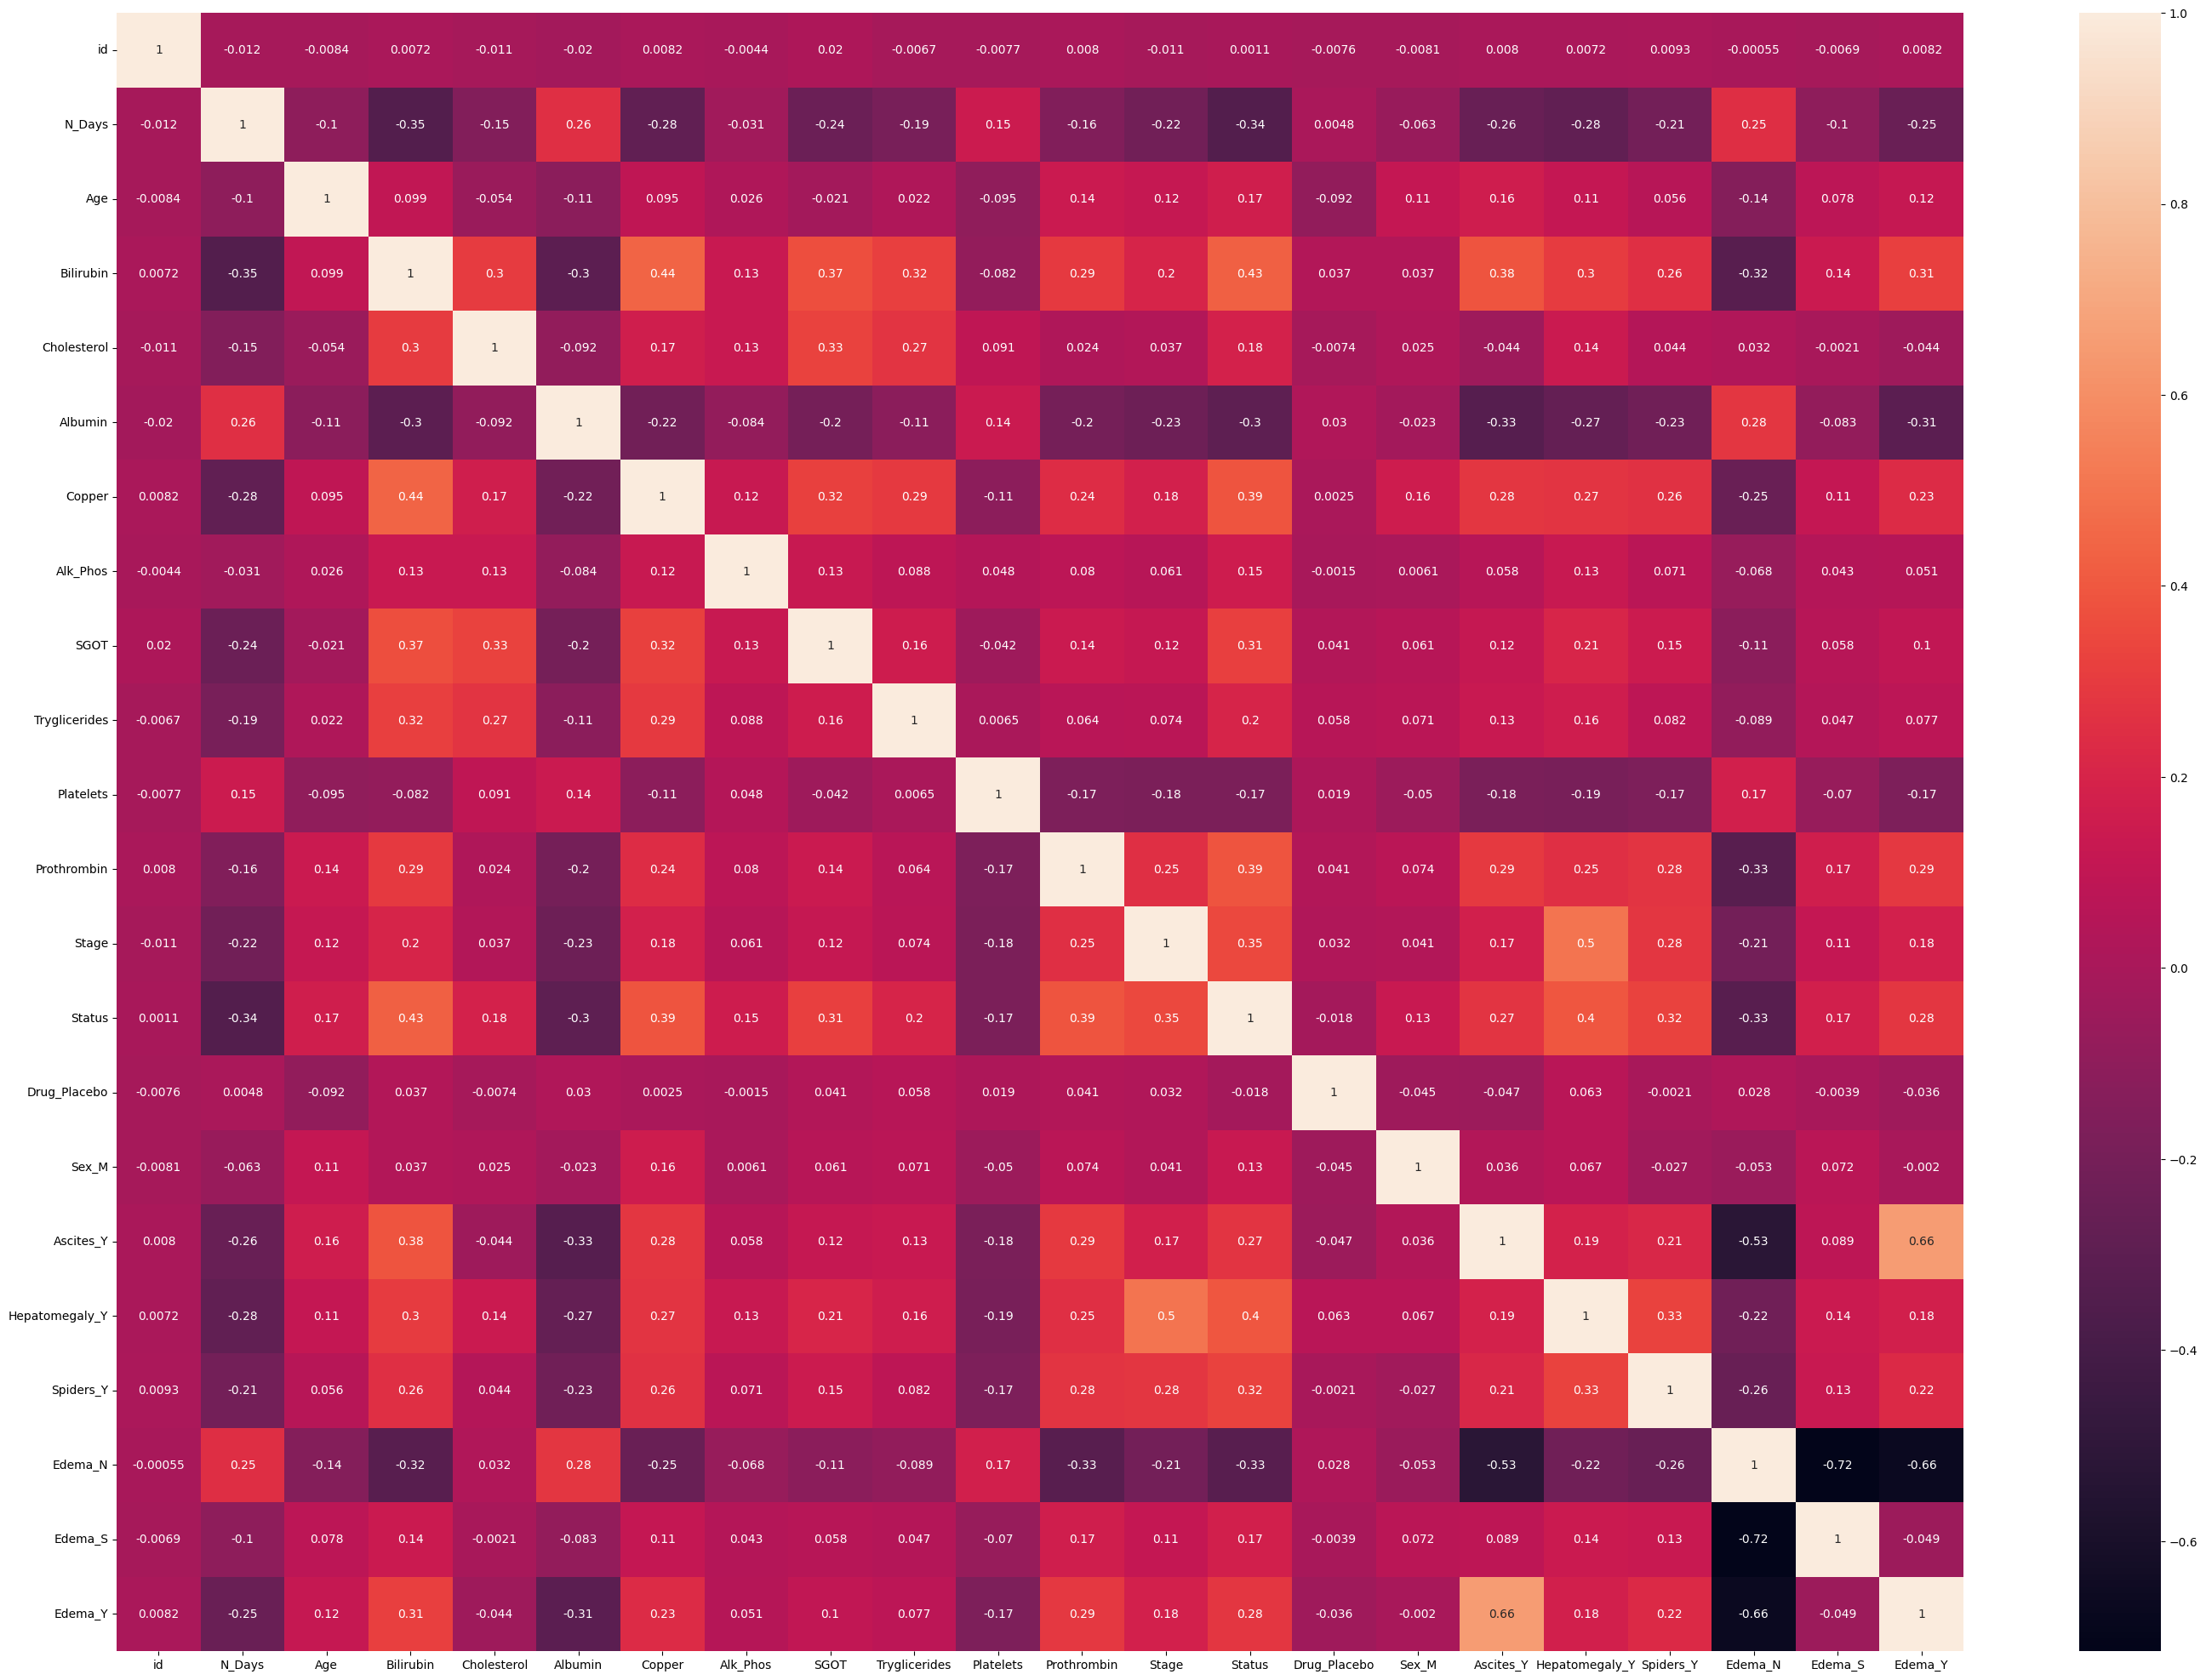

In [17]:
plt.figure(figsize=(35, 25))
sns.heatmap(train.corr(), annot=True)

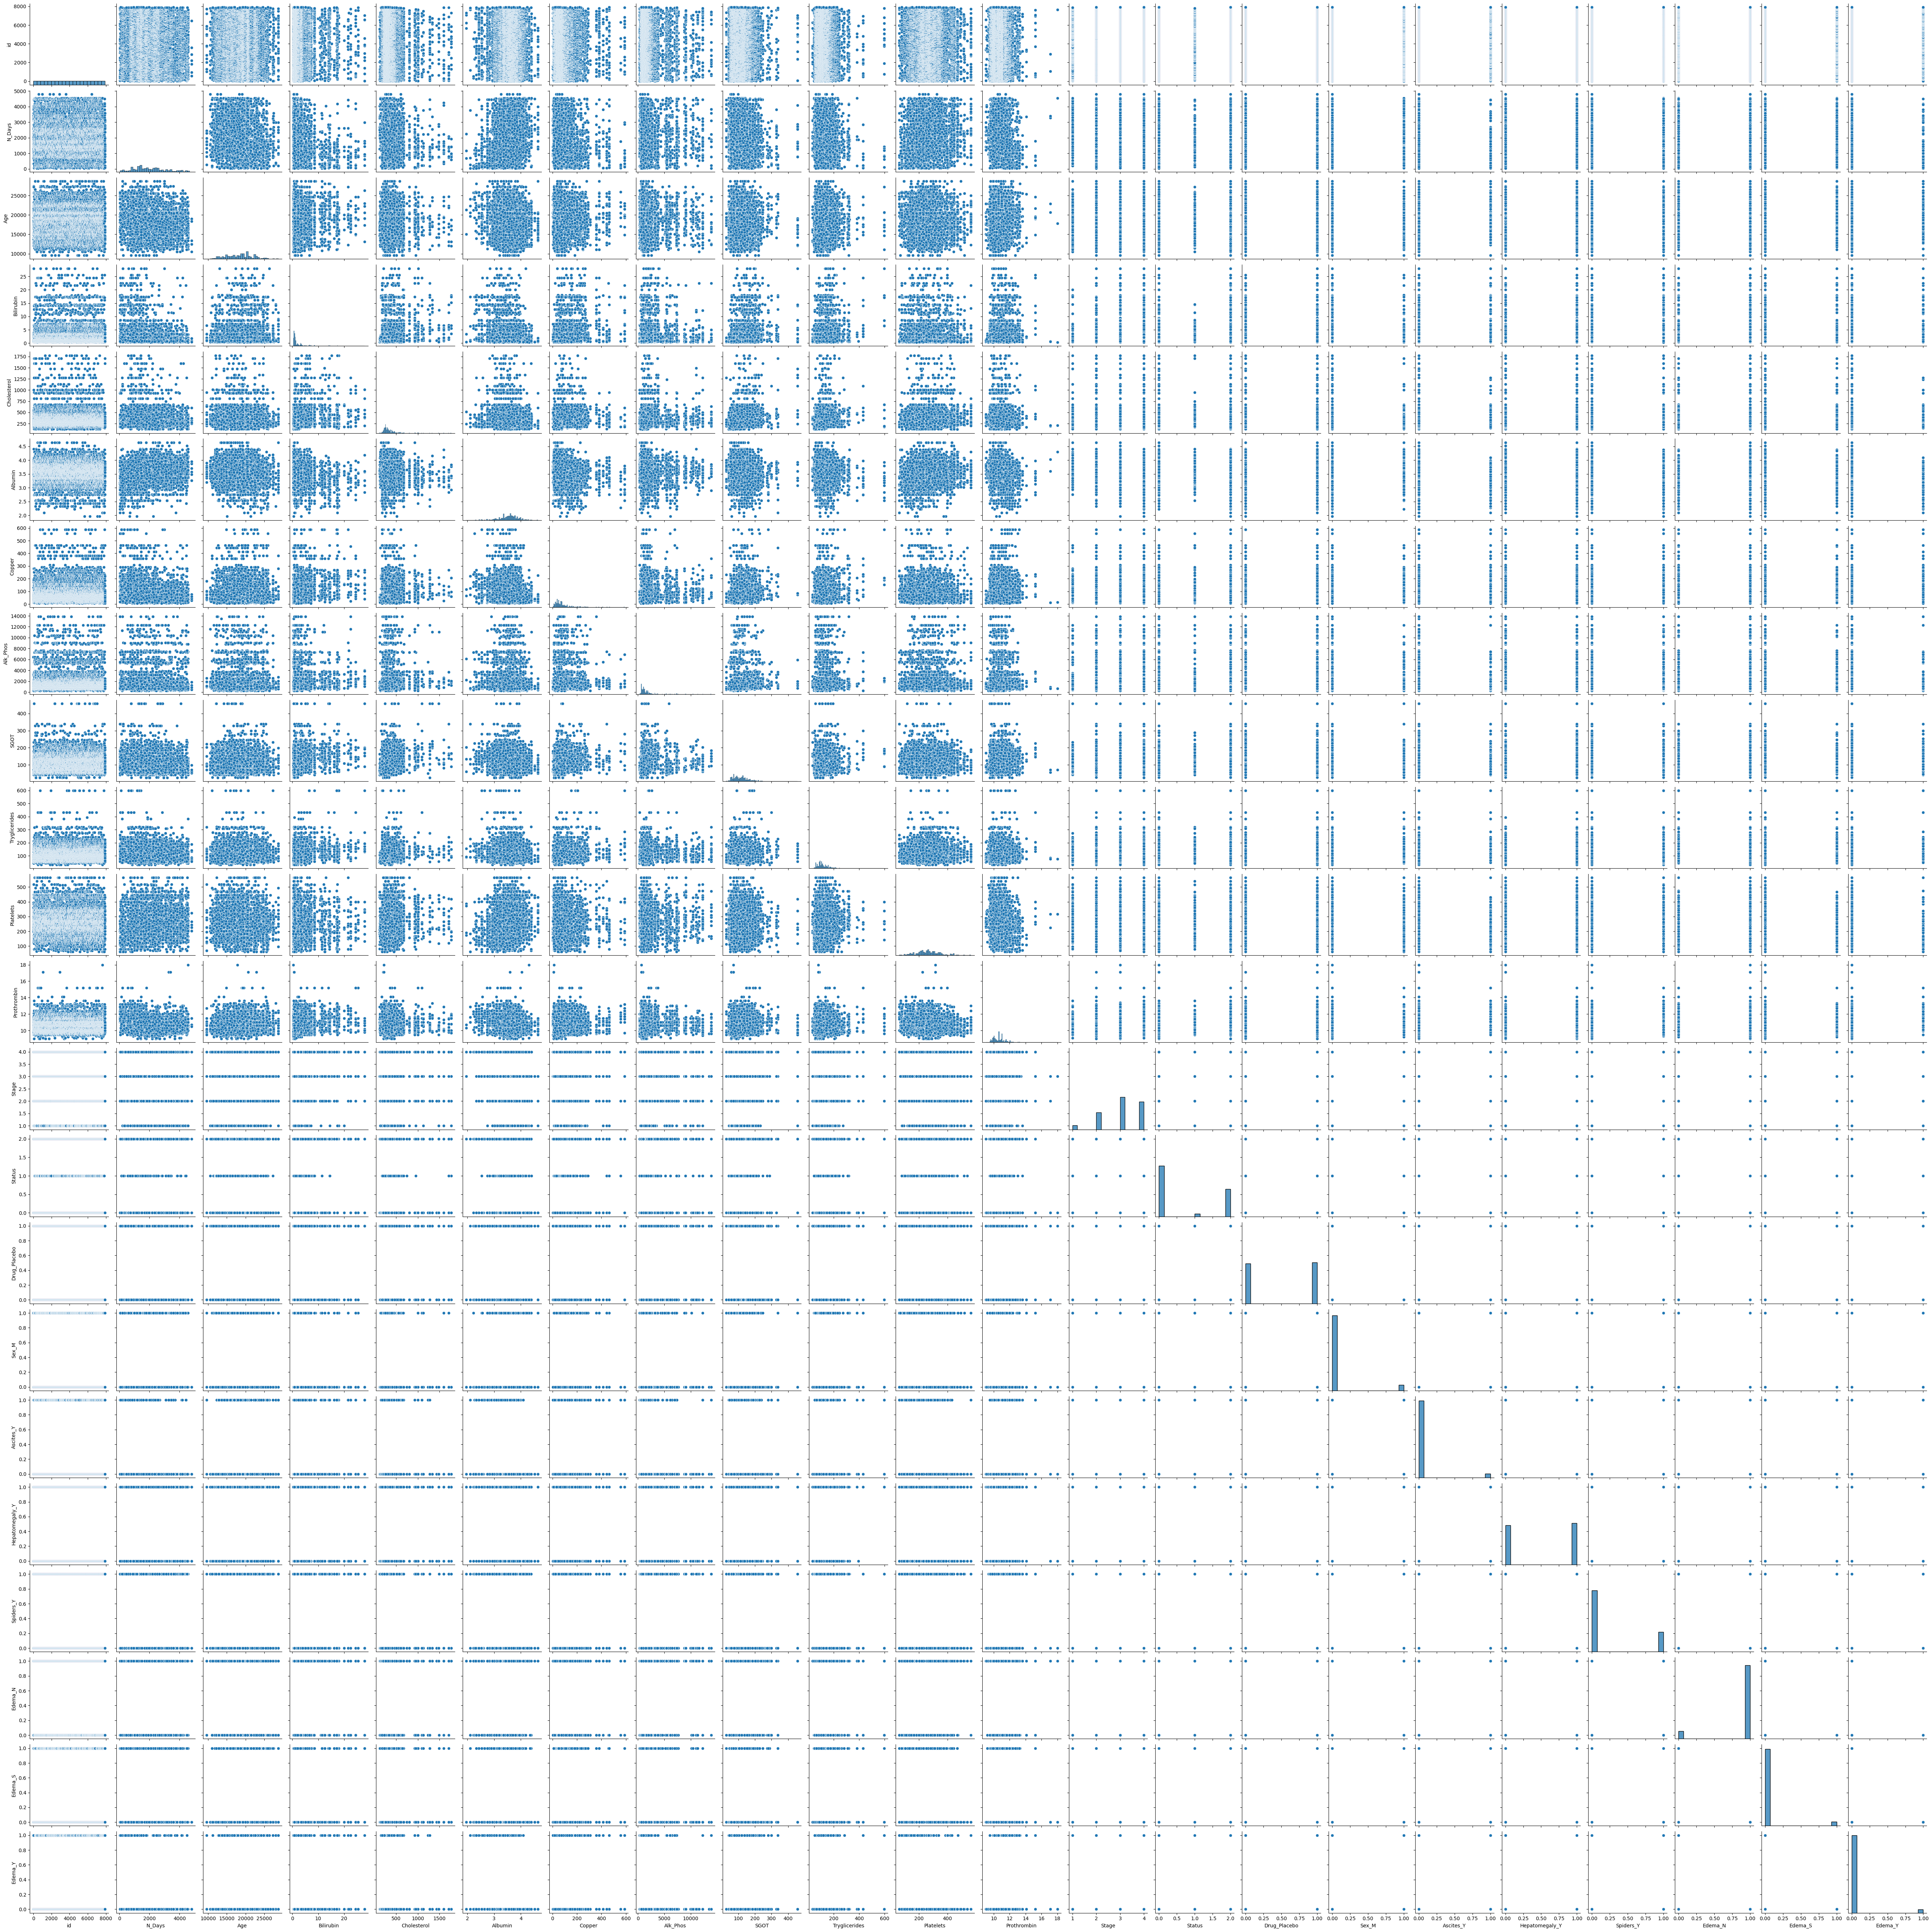

In [313]:
sns.pairplot(train)

In [18]:
train.columns

Index(['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Drug_Placebo', 'Sex_M', 'Ascites_Y',
       'Hepatomegaly_Y', 'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [25]:
def z_score_outliers(column_name):
    colesterol = np.abs((train[column_name] - train[column_name].mean()) / train[column_name].std())

    # Define a threshold
    threshold = 3

    # Identify outliers
    outliers = train[colesterol > threshold]
    return outliers

def quantile_outliers(column_name):
    # Calculate Q1, Q3, and IQR
    Q1 = train[column_name].quantile(0.15)
    Q3 = train[column_name].quantile(0.95)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = train[(train[column_name] < lower_bound) | (train[column_name] > upper_bound)]
    return outliers

def isolation_forest_outliers(column_name):
    # Isolation Forest model
    clf = IsolationForest(contamination=0.003)  # contamination is an estimate of the proportion of outliers
    clf.fit(train[[column_name]])

    # Predictions
    outlier_clm = clf.predict(train[[column_name]])
    outliers = train[outlier_clm == -1]
    return outliers

In [26]:
outliers_stats_df = []
all_outliers = []
outliers_funcs = { "Quantile": quantile_outliers}#, "IsolationForest": isolation_forest_outliers}"Z-score": z_score_outliers,
on_outliers = lambda outliers_df, column, outlier_func: {'Column': column, 'OutlierFunc': outlier_func, 'Outliers_n': len(outliers_df)}
for c in train.columns:
    if len(train[c].value_counts()) < 20:
        continue
    save_outliers_and_add_to_dict_func = lambda outliers_df, column, outlier_func: (all_outliers.append(outliers_df), on_outliers(outliers_df, column, outlier_func))[1]
    [outliers_stats_df.append(save_outliers_and_add_to_dict_func(v(c), c, k)) for k, v in outliers_funcs.items()]

outliers_stats_df = pd.DataFrame(outliers_stats_df)
outliers_stats_df['OutliersRatio'] = outliers_stats_df['Outliers_n'] / len(train)
outliers_stats_df[outliers_stats_df['OutliersRatio'] > outliers_stats_df['OutliersRatio'].quantile(0.75)]

Column OutlierFunc  Outliers_n  OutliersRatio
4    Cholesterol    Quantile          95       0.012018
6         Copper    Quantile          26       0.003289
9  Tryglicerides    Quantile          29       0.003669

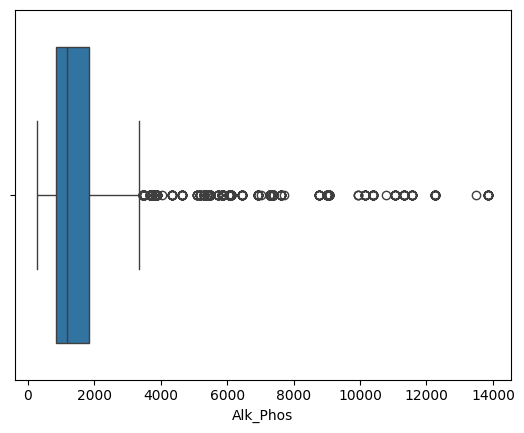

In [188]:
sns.boxplot(x=train['Alk_Phos'])
plt.show()

In [175]:
sns.scatterplot(x='Alk_Phos', y='Status', data=train)
plt.show()

ValueError: Could not interpret value `Status` for `y`. An entry with this name does not appear in `data`.

In [27]:
print("Ratio of outliers", len(pd.concat(all_outliers).drop_duplicates()) / len(train))

Ratio of outliers 0.021884882985452245


In [28]:
pd.concat(all_outliers).drop_duplicates()

id  N_Days    Age  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
29      29     943  19002       28.0        556.0     3.26    39.0    1713.0   
780    780    1433  19098       28.0       1015.0     3.26   152.0    3836.0   
789    789    1785  26259       28.0        468.0     4.18   158.0    2656.0   
1396  1396     223  22265       28.0        205.0     3.25   161.0    1031.0   
2211  2211     943  19098       28.0        556.0     3.57   152.0    3896.0   
...    ...     ...    ...        ...          ...      ...     ...       ...   
2898  2898    3388  22836        0.6        212.0     4.03    10.0     648.0   
5485  5485     853  21699       25.5        358.0     3.52   219.0    2468.0   
7057  7057     552  19577        8.5        468.0     2.84   159.0    1975.0   
7604  7604     216  19246       11.4       1000.0     2.74   140.0    3740.0   
7640  7640    4556  17809        0.3        212.0     4.30    14.0     648.0   

        SGOT  Tryglicerides  ...  Prothrombin  Stage  Status  Drug_Placebo  \
29    171.00          171.0  ...         10.2    3.0       2           1.0   
780   198.40          280.0  ...          9.8    3.0       2           1.0   
789   203.05          131.0  ...         10.9    2.0       2           1.0   
1396   91.45          153.0  ...         11.5    4.0       2           1.0   
2211  198.40          171.0  ...         10.6    3.0       2           1.0   
...      ...            ...  ...          ...    ...     ...           ...   
2898   71.30           77.0  ...         17.1    3.0       0           1.0   
5485  201.50          205.0  ...         15.2    3.0       2           1.0   
7057  167.40          166.0  ...         15.2    4.0       2           1.0   
7604  147.25          133.0  ...         15.2    4.0       2           0.0   
7640   71.30           77.0  ...         18.0    3.0       0           1.0   

      Sex_M  Ascites_Y  Hepatomegaly_Y  Spiders_Y  Edema_S  Edema_Y  
29      0.0        0.0             0.0        0.0      0.0      0.0  
780     0.0        0.0             1.0        0.0      1.0      0.0  
789     0.0        0.0             0.0        0.0      0.0      0.0  
1396    0.0        1.0             1.0        0.0      0.0      1.0  
2211    0.0        0.0             1.0        0.0      1.0      0.0  
...     ...        ...             ...        ...      ...      ...  
2898    0.0        0.0             0.0        0.0      0.0      0.0  
5485    0.0        0.0             1.0        0.0      0.0      0.0  
7057    1.0        0.0             1.0        0.0      0.0      0.0  
7604    0.0        0.0             1.0        1.0      0.0      1.0  
7640    0.0        0.0             0.0        0.0      0.0      0.0  

[173 rows x 21 columns]

In [29]:
train = train.drop(pd.concat(all_outliers).drop_duplicates().index)

In [30]:
label = train['Status']
train = train.drop(['Status','id'], axis = 1)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(train, label ,test_size = 0.25,random_state = 42, stratify=label)

In [14]:
x_train.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y',
       'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss

rf_scaler = StandardScaler()
# Scale the specified columns in the training set
X_train_scaled = x_train.copy()
X_train_scaled[num_cols] = rf_scaler.fit_transform(x_train[num_cols])

# Scale the specified columns in the test set
X_test_scaled = x_test.copy()
X_test_scaled[num_cols] = rf_scaler.transform(x_test[num_cols])

# Train a model with the best parameters
rf = rf = RandomForestClassifier(oob_score=True, **{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300})
rf.fit(X_train_scaled, y_train)
{'OOB Score': rf.score(X_train_scaled, y_train), 'Test Score': rf.score(X_test_scaled, y_test)}
print("Log loss:", log_loss(y_test, rf.predict_proba(X_test_scaled), labels=[0, 1, 2]))

Log loss: 0.5082986664548814


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss

rf_scaler = StandardScaler()
# Scale the specified columns in the training set
X_train_scaled = x_train.copy()
X_train_scaled[num_cols] = rf_scaler.fit_transform(x_train[num_cols])

# Scale the specified columns in the test set
X_test_scaled = x_test.copy()
X_test_scaled[num_cols] = rf_scaler.transform(x_test[num_cols])

# Train a model with the best parameters
rf = rf = LogisticRegression()
rf.fit(X_train_scaled, y_train)
{'OOB Score': rf.score(X_train_scaled, y_train), 'Test Score': rf.score(X_test_scaled, y_test)}
print("Log loss:", log_loss(y_test, rf.predict_proba(X_test_scaled), labels=[0, 1, 2]))

Log loss: 0.5382231884374715


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, log_loss
from xgboost import XGBClassifier

rf_scaler = StandardScaler()
# Scale the specified columns in the training set
X_train_scaled = x_train.copy()
X_train_scaled[num_cols] = rf_scaler.fit_transform(x_train[num_cols])

# Scale the specified columns in the test set
X_test_scaled = x_test.copy()
X_test_scaled[num_cols] = rf_scaler.transform(x_test[num_cols])

# Train a model with the best parameters
rf = XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300})
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict_proba(X_test_scaled)
{'OOB Score': rf.score(X_train_scaled, y_train), 'Test Score': rf.score(X_test_scaled, y_test)}
print("Log loss:", log_loss(y_test, y_pred, labels=[0, 1, 2]))

print(f"Classification Report:\n{classification_report(y_test, np.argmax(y_pred, axis=1))}")
print(f"Accuracy Score: {accuracy_score(y_test, np.argmax(y_pred, axis=1))}")


Log loss: 0.46712873729714277
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1233
           1       0.43      0.09      0.15        66
           2       0.77      0.73      0.75       634

    accuracy                           0.82      1933
   macro avg       0.68      0.58      0.59      1933
weighted avg       0.81      0.82      0.81      1933

Accuracy Score: 0.8215209518882566


In [36]:
np.max(y_pred, axis=1)

array([0.98342055, 0.95021755, 0.9720152 , ..., 0.87984806, 0.49590054,
       0.98641545], dtype=float32)

In [151]:
set(y_test)

{0, 1, 2}

In [224]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, log_loss
import pandas as pd

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=700, activation='relu', solver='adam', random_state=42)

# Training the model
mlp.fit(X_train_scaled, y_train)
# Making predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluating the model
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print("Log loss:", log_loss(y_test, rf.predict_proba(X_test_scaled), labels=[0, 1, 2]))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1233
           1       0.17      0.11      0.13        66
           2       0.73      0.67      0.70       634

    accuracy                           0.79      1933
   macro avg       0.58      0.55      0.56      1933
weighted avg       0.77      0.79      0.78      1933

Accuracy Score: 0.785307811691671
Log loss: 0.5382231884374715


In [143]:
y_pred

array([2, 2, 0, ..., 2, 0, 2])

In [241]:
rf = RandomForestClassifier(oob_score=True, **{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300})
lr = LogisticRegression(solver='liblinear', C=1, penalty='l1')
#mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
xgb = XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 300})

models = [rf, lr, xgb]
[m.fit(X_train_scaled, y_train) for m in models]
scores = np.array([m.score(X_test_scaled, y_test) for m in models])
print('Scores', scores)
print(scores.mean(), scores.std())

avg_probas = np.median([m.predict_proba(x_test) for m in models], axis=0)

# The predicted class is the one with the highest average probability
avg_predictions = np.argmax(avg_probas, axis=1)

# Evaluate the ensemble
ensemble_score = (y_test == avg_predictions).mean()
print('Ensemble Accuracy Score:', ensemble_score)

Scores [0.81583032 0.78789446 0.82255561]
0.8087601310570788 0.01500754110849084
Ensemble Accuracy Score: 0.3279875840662183


In [227]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import pandas as pd


# Converting arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled.to_numpy(), dtype=torch.float32)
print(X_train_tensor.shape)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)
print(y_train_tensor.shape)
X_test_tensor = torch.tensor(X_test_scaled.to_numpy(), dtype=torch.float32)
print(X_test_tensor.shape)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)
print(y_test_tensor.shape)

# Creating TensorDatasets and DataLoader for batch processing
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 16
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

# Defining the Neural Network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train_scaled.shape[-1], 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, 3)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x, apply_softmax=False):
        if isinstance(x, pd.DataFrame):
            x = torch.tensor(x.to_numpy(), dtype=torch.float32)
        x = self.dropout1(torch.relu(self.bn1(self.fc1(x))))
        x = self.dropout2(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout3(torch.relu(self.bn3(self.fc3(x))))
        x = self.fc4(x)
        if apply_softmax:
            x = self.softmax(x)
        return x
    
    def predict_proba(self, x):
        self.eval()
        with torch.no_grad():
            return self.forward(x, apply_softmax=True).numpy()

# Instantiating the model, loss function, and optimizer
model = Net()#.to('mps')
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Print loss every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')
    
    # Evaluate the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for inputs, targets in test_loader:
            outputs = model(inputs, apply_softmax=True)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    print(f'Accuracy: {correct / total}')

# Evaluate the model
model.eval()
test_probabilities = []
test_targets = []
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        probabilities = torch.softmax(outputs, dim=1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
        test_probabilities.append(probabilities.cpu().numpy())
        test_targets.append(targets.cpu().numpy())

print(f'Accuracy: {correct / total}')
# Concatenate all batches
test_probabilities = np.concatenate(test_probabilities, axis=0)
test_targets = np.concatenate(test_targets, axis=0)

# Calculate log loss using sklearn's log_loss function
# Convert targets to one-hot encoding to match the probabilities shape
test_targets_one_hot = np.eye(3)[test_targets]  # Adjust the number '3' if you have a different number of classes
log_loss_value = log_loss(test_targets_one_hot, test_probabilities)

print(f'Log Loss: {log_loss_value}')


torch.Size([5799, 19])
torch.Size([5799])
torch.Size([1933, 19])
torch.Size([1933])
Epoch 1/20, Loss: 1.0164066553115845
Accuracy: 0.793585100879462
Epoch 2/20, Loss: 0.5742775797843933
Accuracy: 0.793067770305225
Epoch 3/20, Loss: 0.25873804092407227
Accuracy: 0.7972064148991206
Epoch 4/20, Loss: 0.23752781748771667
Accuracy: 0.785307811691671
Epoch 5/20, Loss: 0.3321278691291809
Accuracy: 0.7966890843248836
Epoch 6/20, Loss: 0.3603115379810333
Accuracy: 0.793585100879462
Epoch 7/20, Loss: 1.325370192527771
Accuracy: 0.793067770305225
Epoch 8/20, Loss: 0.19767805933952332
Accuracy: 0.8023797206414899
Epoch 9/20, Loss: 0.3795481026172638
Accuracy: 0.7997930677703052
Epoch 10/20, Loss: 0.3082449436187744
Accuracy: 0.7951370926021728
Epoch 11/20, Loss: 0.7172217965126038
Accuracy: 0.7920331091567512
Epoch 12/20, Loss: 0.4072249233722687
Accuracy: 0.8003103983445422
Epoch 13/20, Loss: 0.6189680099487305
Accuracy: 0.7946197620279358
Epoch 14/20, Loss: 0.27664628624916077
Accuracy: 0.798758

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a pipeline with a scaler and logistic regression
pipeline = LogisticRegression(solver='liblinear')

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=0, scoring='neg_log_loss')
# Assume you have training data in X_train and y_train
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = LogisticRegression(solver='liblinear', **grid_search.best_params_).fit(X_train_scaled, y_train)
print("Best test score:", best_model.score(X_test_scaled, y_test))


Best parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation score: 0.7950403085220683
Best test score: 0.7961557916034395


In [240]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'min_child_weight': [5, 7]
}

# Create a pipeline with a scaler and XGBoost classifier
pipeline = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Use grid search to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=0, scoring='neg_log_loss')

# Assume you have training data in X_train and y_train
grid_search.fit(X_train_scaled, y_train)  # Note that we are fitting the raw data, the pipeline will handle scaling

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_model.fit(X_train_scaled, y_train)  # Again, the pipeline takes care of scaling
test_score = best_model.score(X_test_scaled, y_test)
print("Best test score:", test_score)
probabilities = best_model.predict_proba(X_test_scaled)
test_log_loss = log_loss(y_test, probabilities)
print("Log Loss on the test set:", test_log_loss)


Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 300}
Best cross-validation score: -0.45038867565386564
Best test score: 0.8225556130367304
Log Loss on the test set: 0.4672656588260105


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a pipeline with a scaler and logistic regression
pipeline = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='neg_log_loss')
# Assume you have training data in X_train and y_train
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = RandomForestClassifier(random_state=42, **grid_search.best_params_).fit(X_train_scaled, y_train)
print("Best test score:", best_model.score(X_test_scaled, y_test))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
1613.51s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1614.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
/Users/shirabroner/DataScience/venv/Default/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
223 fits failed with the following error:
Traceback (m

Best parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.8267558932980412
Best test score: 0.8270106221547799


In [96]:
feature_names = x_train.columns
feature_importances = pd.Series(rf.feature_importances_, index=feature_names)

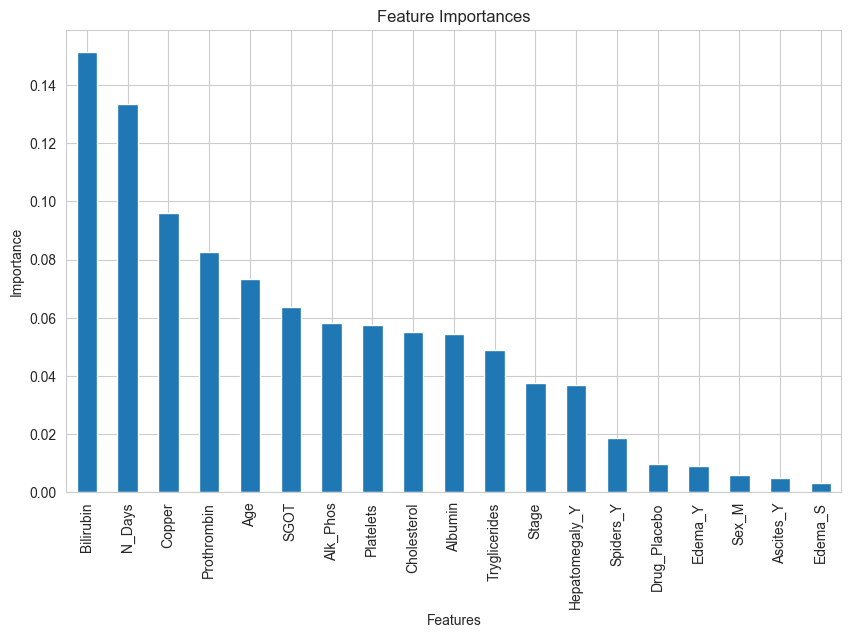

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Sort features by importance
feature_importances = feature_importances.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [139]:
feature_importances[:7]

Bilirubin      0.151403
N_Days         0.133447
Copper         0.096004
Prothrombin    0.082728
Age            0.073203
SGOT           0.063662
Alk_Phos       0.058182
dtype: float64

In [65]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost

# It's good practice to scale the data when using algorithms like SVM, k-NN, and Neural Networks
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(criterion='log_loss'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Evaluate each model using cross-validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_scaled, y_train, cv=3)
    print(f"{name}: Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores)*2:.2f})")


Logistic Regression: Accuracy: 0.79 (+/- 0.01)
Random Forest: Accuracy: 0.82 (+/- 0.01)
Gradient Boosting: Accuracy: 0.82 (+/- 0.01)
Support Vector Machine: Accuracy: 0.80 (+/- 0.02)
K-Nearest Neighbors: Accuracy: 0.79 (+/- 0.03)
Gaussian Naive Bayes: Accuracy: 0.30 (+/- 0.27)
Decision Tree: Accuracy: 0.73 (+/- 0.01)
XGBoost: Accuracy: 0.82 (+/- 0.02)


In [22]:
x_train.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y',
       'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [23]:
x_test.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Drug_Placebo', 'Sex_M', 'Ascites_Y', 'Hepatomegaly_Y',
       'Spiders_Y', 'Edema_S', 'Edema_Y'],
      dtype='object')

In [137]:
#test = test.drop(['id'], axis=1)
test_scaled = test.copy()
test_scaled[num_cols] = rf_scaler.transform(test[num_cols])
predictions = model.predict_proba(test_scaled)
predictions

array([[0.6489777 , 0.00961098, 0.3414113 ],
       [0.8228761 , 0.05906214, 0.11806181],
       [0.02613863, 0.00469399, 0.9691674 ],
       ...,
       [0.83334696, 0.00878233, 0.15787075],
       [0.9667049 , 0.01463667, 0.01865841],
       [0.3680838 , 0.00241885, 0.6294973 ]], dtype=float32)

In [138]:
for i, c in enumerate(sample_submission.columns):
    if c == 'id':
        continue
    sample_submission[c] = predictions[:,i-1]

In [139]:
sample_submission.to_csv('submission.csv', index=False)

In [325]:
%%time 
print('hi')

hi
CPU times: user 83 µs, sys: 26 µs, total: 109 µs
Wall time: 108 µs
